<a href="https://colab.research.google.com/github/speacock103/MachineLearningFall2020/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

# Task 2

Simple SVM with 4 data points, given classification of negative (0) or positive (1)

In [2]:
x = [[-1,-1],[-1,1],[1,-1],[1,1]]
y = [0, 1, 1, 0]

basesv = svm.SVC()
basesv.fit (x, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

No handles with labels found to put in legend.


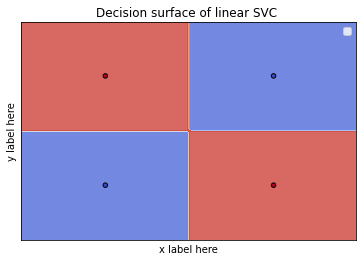

In [3]:
#credit for 2d plot code to user seralouk on stackoverflow
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
x = np.array(x)
X0, X1 = x[:, 0], x[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, basesv, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

# Task 7

Imports

In [13]:
import io
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

Fetch dataset

In [6]:
from google.colab import files
uploaded = files.upload()

titanic_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
titanic_test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

Saving test.csv to test.csv
Saving train.csv to train.csv


Data preprocessing

In [7]:
titanic_train = titanic_train.drop("PassengerId", axis=1)
titanic_train = titanic_train.drop("Name", axis=1)
titanic_train = titanic_train.drop("Ticket", axis=1)
titanic_train = titanic_train.drop("Cabin", axis=1)
titanic_test = titanic_test.drop("PassengerId", axis=1)
titanic_test = titanic_test.drop("Name", axis=1)
titanic_test = titanic_test.drop("Ticket", axis=1)
titanic_test = titanic_test.drop("Cabin", axis=1)

sex = {"male": 0, "female": 1}
data = [titanic_train, titanic_test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(sex)

import random as rd

age_mean = np.mean(titanic_train.Age)
age_std = np.std(titanic_train.Age)
minus = age_mean - age_std
plus = age_mean + age_std

for row in titanic_train.loc[titanic_train.Age.isnull(), 'Age'].index:
    titanic_train.at[row, 'Age'] = rd.randint(int(minus), int(plus))

for row in titanic_test.loc[titanic_test.Age.isnull(), 'Age'].index:
    titanic_test.at[row, 'Age'] = rd.randint(int(minus), int(plus))

port = {"S": 0, "C": 1, "Q": 2}
portdata = [titanic_train, titanic_test]

for dataset in portdata:
    dataset['Embarked'] = dataset['Embarked'].map(port)

Embarkedtop = titanic_train.Embarked.mode()
for row in titanic_train.loc[titanic_train.Embarked.isnull(), 'Embarked'].index:
    titanic_train.at[row, 'Embarked'] = Embarkedtop

Embarkedtoptest = titanic_test.Embarked.mode()
for row in titanic_test.loc[titanic_test.Embarked.isnull(), 'Embarked'].index:
    titanic_test.at[row, 'Embarked'] = Embarkedtoptest

Faretop = titanic_train.Fare.mode()
for row in titanic_train.loc[titanic_train.Fare.isnull(), 'Fare'].index:
    titanic_train.at[row, 'Fare'] = Faretop
  
Faretoptest = titanic_test.Fare.mode()
for row in titanic_test.loc[titanic_test.Fare.isnull(), 'Fare'].index:
    titanic_test.at[row, 'Fare'] = Faretoptest

titanic_trainrev = titanic_train.drop("Survived", axis=1)
survival_train = titanic_train["Survived"]

Using linear kernel

In [8]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(titanic_trainrev, survival_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

scores = cross_validate(linear_svc, titanic_trainrev, survival_train, cv=5, scoring = scoring)
print (scores)

{'fit_time': array([ 5.59750891,  2.86562753,  3.34305739, 13.5314579 , 10.5738585 ]), 'score_time': array([0.00571513, 0.00503397, 0.00782013, 0.0045464 , 0.00526524]), 'test_accuracy': array([0.80446927, 0.80898876, 0.78651685, 0.75280899, 0.78651685]), 'test_precision': array([0.75      , 0.765625  , 0.734375  , 0.71428571, 0.75409836]), 'test_recall': array([0.73913043, 0.72058824, 0.69117647, 0.58823529, 0.66666667]), 'test_f1_score': array([0.74452555, 0.74242424, 0.71212121, 0.64516129, 0.70769231])}


Using polynomial kernel

In [12]:
polynomial_svc = svm.SVC(kernel='poly')
polynomial_svc.fit(titanic_trainrev, survival_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

scores = cross_validate(polynomial_svc, titanic_trainrev, survival_train, cv=5, scoring = scoring)
print (scores)

{'fit_time': array([0.03378296, 0.06222129, 0.01793003, 0.02494884, 0.05545616]), 'score_time': array([0.00546479, 0.00591326, 0.00605559, 0.00567746, 0.00643086]), 'test_accuracy': array([0.62011173, 0.68539326, 0.64606742, 0.64044944, 0.6741573 ]), 'test_precision': array([0.55555556, 0.875     , 0.66666667, 0.66666667, 1.        ]), 'test_recall': array([0.07246377, 0.20588235, 0.14705882, 0.11764706, 0.15942029]), 'test_f1_score': array([0.12820513, 0.33333333, 0.24096386, 0.2       , 0.275     ])}


Using rbf kernel

In [9]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(titanic_trainrev, survival_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

scores = cross_validate(rbf_svc, titanic_trainrev, survival_train, cv=5, scoring = scoring)
print (scores)

{'fit_time': array([0.02870345, 0.02289271, 0.02015328, 0.02135587, 0.02248359]), 'score_time': array([0.00720716, 0.00897241, 0.00717592, 0.00785232, 0.00816035]), 'test_accuracy': array([0.58659218, 0.71348315, 0.69101124, 0.68539326, 0.69101124]), 'test_precision': array([0.4137931 , 0.72972973, 0.74074074, 0.75      , 0.73333333]), 'test_recall': array([0.17391304, 0.39705882, 0.29411765, 0.26470588, 0.31884058]), 'test_f1_score': array([0.24489796, 0.51428571, 0.42105263, 0.39130435, 0.44444444])}
